<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

## Подготовка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle 

import warnings
warnings.filterwarnings('ignore')

Импортируем данные.

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

Познакомимся с данными.  
   
**Признаки:**  
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
  
**Целевой признак:**  
- Exited — факт ухода клиента

In [3]:
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Проверим данные на наличие пропусков. Пропуски есть только в столбце Tenure. Эти пропуски можно заменить средними значениями по столбцу.

In [4]:
data.isna().sum()
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].mean())

Проверим данные на наличие дубликатов. Дубликатов нет.

In [5]:
data.duplicated().sum()

0

Проверим данные на наличие аномальных значений. Аномальные значения не обнаружены.

In [6]:
data['CreditScore'].unique()
data['Gender'].unique()
data['Age'].unique()
data['Tenure'].unique()
data['Balance'].unique()
data['NumOfProducts'].unique()
data['HasCrCard'].unique()
data['IsActiveMember'].unique()
data['EstimatedSalary'].unique()
data['Exited'].unique()

array([1, 0])

Заменим категориальные значения в столбцах числовыми.

In [7]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0


Выделим в отдельный датасет данные, которые потребуются для создания модели.

In [8]:
data_for_model = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Exited']]
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Exited             10000 non-null  int64  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Разделим данные на обучающую, валидационную и тестовую выборки и масштабируем количественные признаки.

In [9]:
features = data_for_model.drop('Exited', axis=1)
target = data_for_model['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345, stratify=target_valid)

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(len(features_train))
print(len(features_valid))
print(len(features_test))

6000
2000
2000


Данные готовы к работе.

## Исследование задачи

Изучим дисбаланс классов в предоставленных данных.

In [10]:
print(data_for_model[data_for_model['Exited'] == 1]['Exited'].count())
print(data_for_model[data_for_model['Exited'] == 0]['Exited'].count())

2037
7963


В предоставленных данных очень сильный дисбаланс классов. Клиентов, которые остались, почти в 4 раза больше, чем клиентов, которые ушли.

Подберем наилучшую модель без учета дисбаланса классов.

In [11]:
best_f1_log_reg = 0
best_iter = 0
best_auc_roc_log_reg = 0
for i in range(100, 200):
    model = LogisticRegression(solver='liblinear', random_state=12345, max_iter=i)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_log_reg:
        best_f1_log_reg = f1
        best_iter = i
        best_auc_roc_log_reg = auc_roc

print('Лучшее количество итераций для логистической регрессии:', best_iter)
print('F1 лучшей логистической регрессии:', best_f1_log_reg)
print('AUC-ROC лучшей логистической регресси:', best_auc_roc_log_reg)

Лучшее количество итераций для логистической регрессии: 100
F1 лучшей логистической регрессии: 0.3076923076923077
AUC-ROC лучшей логистической регресси: 0.5859813774756133


In [12]:
best_f1_tree = 0
best_auc_roc_tree = 0
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_tree:
        best_f1_tree = f1
        best_auc_roc_tree = auc_roc
        best_depth = depth

print('Глубина лучшего древа решений:', best_depth)
print('F1 лучшего древа решений:', best_f1_tree)
print('AUC-ROC лучшего древа решений:', best_auc_roc_tree)

Глубина лучшего древа решений: 7
F1 лучшего древа решений: 0.5924855491329479
AUC-ROC лучшего древа решений: 0.7264139324071337


In [13]:
best_f1_forest = 0
best_auc_roc_forest = 0
best_est = 0
for est in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        best_auc_roc_forest = auc_roc
        best_est = est

print('Лучшее количество деревьев для случайного леса:', best_est)
print('F1 лучшего случайного леса:', best_f1_forest)
print('AUC-ROC лучшего случайного леса:', best_auc_roc_forest)

Лучшее количество деревьев для случайного леса: 43
F1 лучшего случайного леса: 0.6153846153846153
AUC-ROC лучшего случайного леса: 0.7360577396787861


Наилучший результат среди моделей без учета дисбаланса классов показала модель случайного леса с количеством деревьев 43. F1 данной модели - 0.62, AUC-ROC - 0.73. 

## Борьба с дисбалансом

Подберем наилучшие параметры для модели логистической регрессии с учетом дисбаланса классов. Оценивать модель будем метриками F1 и AUC-ROC.

In [14]:
best_f1_log_reg = 0
best_iter = 0
best_auc_roc_log_reg = 0
for i in range(100, 200):
    model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=12345, max_iter=i)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_log_reg:
        best_f1_log_reg = f1
        best_iter = i
        best_auc_roc_log_reg = auc_roc

print('Лучшее количество итераций для логистической регрессии:', best_iter)
print('F1 лучшей логистической регрессии:', best_f1_log_reg)
print('AUC-ROC лучшей логистической регресси:', best_auc_roc_log_reg)

Лучшее количество итераций для логистической регрессии: 100
F1 лучшей логистической регрессии: 0.5289982425307558
AUC-ROC лучшей логистической регресси: 0.7341363681150852


Лучший результат показала модель логистической регрессии с количеством итераций 100.

Подберем наилучшие параметры для модели древа решений с учетом дисбаланса классов. Оценивать модель будем метриками F1 и AUC-ROC.

In [15]:
best_f1_tree = 0
best_auc_roc_tree = 0
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeClassifier(class_weight='balanced', random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_tree:
        best_f1_tree = f1
        best_auc_roc_tree = auc_roc
        best_depth = depth

print('Глубина лучшего древа решений:', best_depth)
print('F1 лучшего древа решений:', best_f1_tree)
print('AUC-ROC лучшего древа решений:', best_auc_roc_tree)

Глубина лучшего древа решений: 6
F1 лучшего древа решений: 0.575925925925926
AUC-ROC лучшего древа решений: 0.7677480539954675


Наилучший результат показала модель древа решений с глубиной 6.

Подберем наилучшие параметры для модели случайного леса с учетом дисбаланса классов. Оценивать модель будем метриками F1 и AUC-ROC.

In [16]:
best_f1_forest = 0
best_auc_roc_forest = 0
best_est = 0
for est in range(1, 50):
    model = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        best_auc_roc_forest = auc_roc
        best_est = est
        best_auc_roc_forest = auc_roc

print('Лучшее количество деревьев для случайного леса:', best_est)
print('F1 лучшего случайного леса:', best_f1_forest)
print('AUC-ROC лучшего случайного леса:', best_auc_roc_forest)

Лучшее количество деревьев для случайного леса: 9
F1 лучшего случайного леса: 0.6042553191489363
AUC-ROC лучшего случайного леса: 0.7346475022169672


Наилучший результат показала модель случайного леса с количеством деревьев 9.

**Среди всех моделей наилучший результат показала модель случайного леса с количеством деревьев 9. Посмотрим подробнее на результаты ее работы:**

F1: 0.6042553191489363
AUC-ROC: 0.7346475022169672


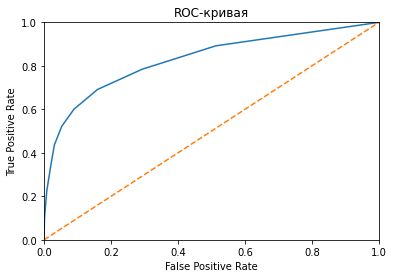

In [17]:
model = RandomForestClassifier(class_weight='balanced', random_state=12345, n_estimators=9)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, predicted_valid)
probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

print('F1:', f1)
print('AUC-ROC:', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Выбранная модель показала качественные результаты на валидационной выборке.

**Посмотрим, какие результаты будут показывать модели, если использовать для борьбы с дисбалансом классов метод увеличения выборки.**

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [19]:
best_f1_log_reg = 0
best_iter = 0
best_auc_roc_log_reg = 0
for iter in range(100, 200):
    model = LogisticRegression(solver='liblinear', random_state=12345, max_iter=iter)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_log_reg:
        best_f1_log_reg = f1
        best_iter = iter
        best_auc_roc_log_reg = auc_roc

print('Лучшее количество итераций для логистической регрессии:', best_iter)
print('F1 лучшей логистической регрессии:', best_f1_log_reg)
print('AUC-ROC лучшей логистической регресси:', best_auc_roc_log_reg)

Лучшее количество итераций для логистической регрессии: 100
F1 лучшей логистической регрессии: 0.5246753246753246
AUC-ROC лучшей логистической регресси: 0.7318762932308602


In [20]:
best_f1_tree = 0
best_auc_roc_tree = 0
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_tree:
        best_f1_tree = f1
        best_auc_roc_tree = auc_roc
        best_depth = depth

print('Глубина лучшего древа решений:', best_depth)
print('F1 лучшего древа решений:', best_f1_tree)
print('AUC-ROC лучшего древа решений:', best_auc_roc_tree)

Глубина лучшего древа решений: 6
F1 лучшего древа решений: 0.575925925925926
AUC-ROC лучшего древа решений: 0.7677480539954675


In [21]:
best_f1_forest = 0
best_auc_roc_forest = 0
best_est = 0
for est in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        best_auc_roc_forest = auc_roc
        best_est = est

print('Лучшее количество деревьев для случайного леса:', best_est)
print('F1 лучшего случайного леса:', best_f1_forest)
print('AUC-ROC лучшего случайного леса:', best_auc_roc_forest)

Лучшее количество деревьев для случайного леса: 35
F1 лучшего случайного леса: 0.6133682830930538
AUC-ROC лучшего случайного леса: 0.7487621933195389


**Посмотрим, какие результаты будет показывать модель, если использовать для борьбы с дисбалансом классов метод уменьшения выборки.**

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [23]:
best_f1_log_reg = 0
best_iter = 0
best_auc_roc_log_reg = 0
for i in range(100, 200):
    model = LogisticRegression(solver='liblinear', random_state=12345, max_iter=i)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_log_reg:
        best_f1_log_reg = f1
        best_iter = i
        best_auc_roc_log_reg = auc_roc

print('Лучшее количество итераций для логистической регрессии:', best_iter)
print('F1 лучшей логистической регрессии:', best_f1_log_reg)
print('AUC-ROC лучшей логистической регресси:', best_auc_roc_log_reg)

Лучшее количество итераций для логистической регрессии: 100
F1 лучшей логистической регрессии: 0.5275862068965517
AUC-ROC лучшей логистической регресси: 0.7349246231155779


In [24]:
best_f1_tree = 0
best_auc_roc_tree = 0
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_tree:
        best_f1_tree = f1
        best_auc_roc_tree = auc_roc
        best_depth = depth

print('Глубина лучшего древа решений:', best_depth)
print('F1 лучшего древа решений:', best_f1_tree)
print('AUC-ROC лучшего древа решений:', best_auc_roc_tree)

Глубина лучшего древа решений: 6
F1 лучшего древа решений: 0.5944919278252612
AUC-ROC лучшего древа решений: 0.7793070745886295


In [25]:
best_f1_forest = 0
best_auc_roc_forest = 0
best_est = 0
for est in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, predicted_valid)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        best_auc_roc_forest = auc_roc
        best_est = est

print('Лучшее количество деревьев для случайного леса:', best_est)
print('F1 лучшего случайного леса:', best_f1_forest)
print('AUC-ROC лучшего случайного леса:', best_auc_roc_forest)

Лучшее количество деревьев для случайного леса: 39
F1 лучшего случайного леса: 0.6041275797373358
AUC-ROC лучшего случайного леса: 0.7890802049463


Наилучший результат среди всех построенных моделей показала модель случайного леса с количеством деревьев 35 при использовании метода увеличения выборки для борьбы с дисбалансом классов. F1 данной модели на валидационной выборке - 0.61, а AUC-ROC - 0.75. Подберем еще один гиперпараметр - глубину древа, чтобы улучшить данные показатели.

In [26]:
best_f1_forest = 0
best_auc_roc_forest = 0
best_est = 0
best_max_depth = 0

for est in range(10, 50):
    for depth in range(10, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        auc_roc = roc_auc_score(target_valid, predicted_valid)
        
        if f1 > best_f1_forest:
            best_f1_forest = f1
            best_auc_roc_forest = auc_roc
            best_est = est
            best_max_depth = depth

print('Лучшее количество деревьев для случайного леса:', best_est)
print('Лучшая глубина для случайного леса:', best_max_depth)
print('F1 лучшего случайного леса:', best_f1_forest)
print('AUC-ROC лучшего случайного леса:', best_auc_roc_forest)

Лучшее количество деревьев для случайного леса: 37
Лучшая глубина для случайного леса: 10
F1 лучшего случайного леса: 0.6513157894736842
AUC-ROC лучшего случайного леса: 0.7989580254212237


Была подобрана лучшая глубина древа для данной модели - 10 лучшее для этой глубины количество деревьев - 37. Посмотрим на работу модели с подобранными гиперпараметрами на валидационной выборке.

F1: 0.6513157894736842
AUC-ROC: 0.7989580254212237


Text(0.5, 1.0, 'ROC-кривая')

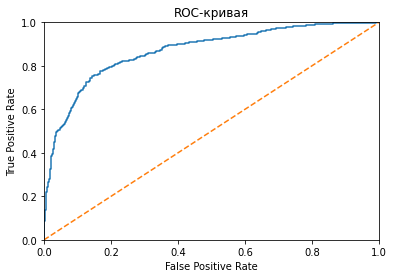

In [28]:
model = RandomForestClassifier(random_state=12345, n_estimators=37, max_depth=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, predicted_valid)
probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:, 1]

print('F1:', f1)
print('AUC-ROC:', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

Выбранная модель показала качественные результаты: F1 - 0.65, AUC-ROC - 0.8.

## Тестирование модели

Проведем финальное тестирование выбранной модели на тестовой выборке.

F1: 0.5973154362416108
AUC-ROC: 0.75895772505942


Text(0.5, 1.0, 'ROC-кривая')

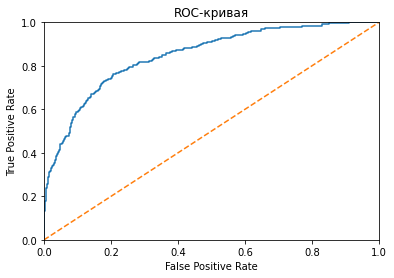

In [29]:
model = RandomForestClassifier(random_state=12345, n_estimators=37, max_depth=10)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_test, predicted_test)
probabilities = model.predict_proba(features_test)
probabilities_one = probabilities[:, 1]

print('F1:', f1)
print('AUC-ROC:', auc_roc)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

Финальное тестирование прошло успешно. На тестовой выборке модель показала F1 - 0.6, AUC-ROC - 0.76.

**Финальный вывод:**  
В ходе работы были исследованы полученные данные, дисбаланс классов. Были построены модели разных типов без учета дисбаланса классов, а также используя три способа работы с лисбалансом классов. В результате была выбрана модель, показавшая наилучший результат - это модель случайного леса с использованием увеличения выборки как метода борьбы с дисбалансом классов, с количеством деревьев 35 и максимальной глубиной 10. На валидационной выборке данная модель показала F1 - 0.65, AUC-ROC - 0.8, а на тестовой F1 - 0.6, AUC-ROC - 0.76.